In [157]:
import pandas as pd
import re
import codecs
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

In [165]:
# помимо общей статистики по числам, нужна еще вероятность по выпадению чисел в суперпризе.
# также нужна статистика по выйгрышам с наиболее вероятными числами.

In [166]:
# 14.02.2021 08:20
# 285
# 20  32  21  25  34  31 
# ⚲
# Суперприз
# разыгран	4 491 826

In [164]:
# 26.09.2021 08:20
# 317
# 34  23  32  14  17  21 
# ⚲
# 4 165 325

In [173]:
entries = None
res = []
with codecs.open('input.txt', encoding='utf-8') as f:
    for line in f:
        line = line.replace('\r\n','')
        match = re.search("^([0-9]{2}.[0-9]{2}.[0-9]{4})",line)
        if match is not None:
            if entries is not None:
                res.append(entries)
            entries = {'date': line}
        match = re.search("^[\d]{1,3}$",line)
        if match is not None:
            entries['episode'] = line
        match = re.search("^\d{2}(?:\s+\d+){5}\s$",line)
        if match is not None:
            entries['result'] = line
        if 'Суперприз' in line:
            entries['super'] = True

In [121]:
data = pd.DataFrame(res).fillna(False)

In [122]:
data.head()

,date,episode,result,super
0,03.10.2021 08:20,318,33 08 07 11 25 02,False
1,26.09.2021 08:20,317,34 23 32 14 17 21,False
2,19.09.2021 08:20,316,10 23 32 03 34 07,False
3,12.09.2021 08:20,315,25 21 05 09 14 30,False
4,05.09.2021 08:20,314,23 06 33 34 18 05,False


In [123]:
data.describe()

,date,episode,result,super
count,317,317,317,317
unique,317,317,317,2
top,24.09.2017 08:20,207,31 06 28 10 03 19,False
freq,1,1,1,282


In [186]:
def stats(data, cols=range(6)):
    mat = np.stack(data.result.apply(lambda x: np.array([int(s) for s in x.split()])).values)

    N = len(mat)
    print('episodes', N)
    mat = mat[:,cols]
    mat = mat.flatten()

    _ = plt.hist(mat, bins=36)
    average = len(cols) * N / 36
    plt.hlines(average,1,36,color='r')
    var = len(cols) * N * 35 / 36 / 36
    plt.hlines(average + np.sqrt(var),1,36,color='r',linestyles='dashed')
    plt.hlines(average - np.sqrt(var),1,36,color='r',linestyles='dashed')

    print('p-value:', chisquare(pd.value_counts(mat).values).pvalue)

episodes 317
p-value: 0.960952673398803


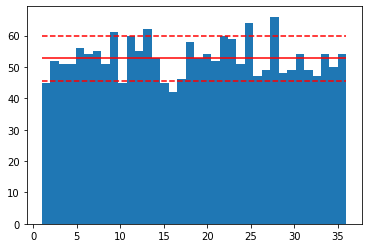

In [187]:
stats(data)

episodes 35
p-value: 0.39822185072664906


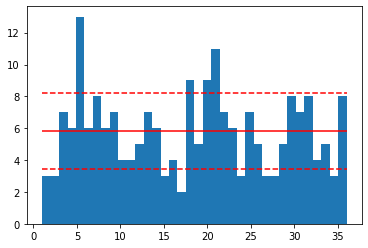

In [188]:
stats(data.loc[data.super])

episodes 317
p-value: 0.3775660966067862
episodes 317
p-value: 0.6254573842242819
episodes 317
p-value: 0.7606319979485193
episodes 317
p-value: 0.3775660966067862
episodes 317
p-value: 0.5923839988375434
episodes 317
p-value: 0.4391429716596139


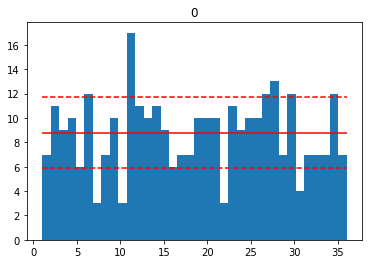

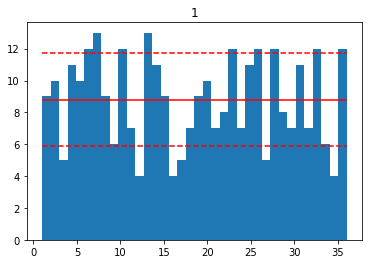

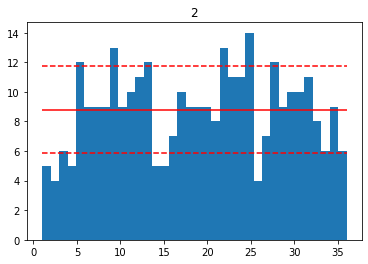

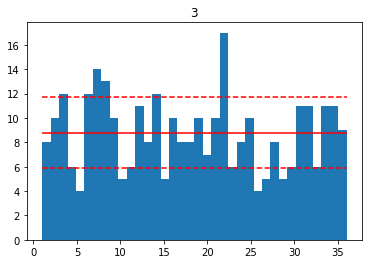

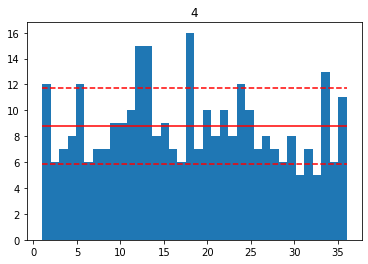

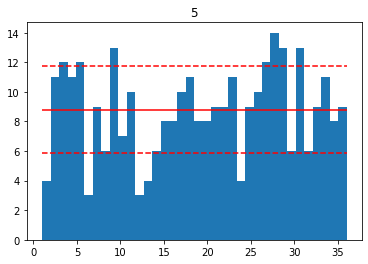

In [205]:
for i in range(6):
    plt.figure(i)
    plt.title(i)
    stats(data, cols=[i])